# RSI

#### As a momentum indicator, the relative strength index compares a security's strength on days when prices go up to its strength on days when prices go down. Relating the result of this comparison to price action can give traders an idea of how a security may perform.

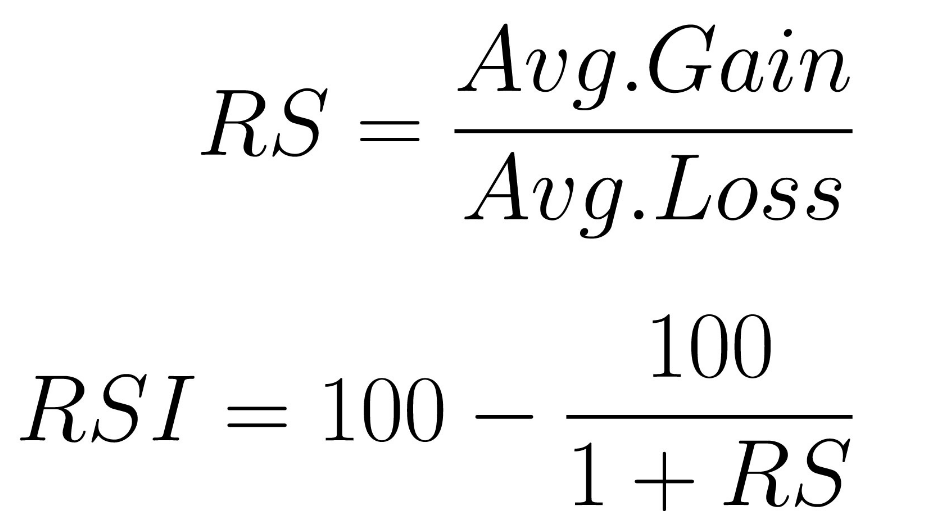

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN','JNJ']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN','JNJ']

#It is annual data
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN,JNJ]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON","J&J"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)

df.head(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-02-22,148.869995,149.949997,147.160004,148.910004,148.119400,51011300,APPLE
2023-02-23,150.089996,150.339996,147.240005,149.399994,148.606796,48394200,APPLE
2023-02-24,147.110001,147.190002,145.720001,146.710007,145.931061,55469600,APPLE
2023-02-27,147.710007,149.169998,147.449997,147.919998,147.134644,44998500,APPLE
2023-02-28,147.050003,149.080002,146.830002,147.410004,146.627365,50547000,APPLE
2023-03-01,146.830002,147.229996,145.009995,145.309998,144.538498,55479000,APPLE
2023-03-02,144.380005,146.710007,143.899994,145.910004,145.135330,52238100,APPLE
2023-03-03,148.039993,151.110001,147.330002,151.029999,150.228119,70732300,APPLE
2023-03-06,153.789993,156.300003,153.460007,153.830002,153.013275,87558000,APPLE


In [3]:
df['Date'] = df.index
df

,Open,High,Low,Close,Adj Close,Volume,company_name,Date
Date,,,,,,,,
2023-02-22,148.869995,149.949997,147.160004,148.910004,148.119400,51011300,APPLE,2023-02-22
2023-02-23,150.089996,150.339996,147.240005,149.399994,148.606796,48394200,APPLE,2023-02-23
2023-02-24,147.110001,147.190002,145.720001,146.710007,145.931061,55469600,APPLE,2023-02-24
2023-02-27,147.710007,149.169998,147.449997,147.919998,147.134644,44998500,APPLE,2023-02-27
2023-02-28,147.050003,149.080002,146.830002,147.410004,146.627365,50547000,APPLE,2023-02-28
...,...,...,...,...,...,...,...,...
2024-02-14,156.350006,156.460007,154.839996,155.740005,154.566437,9098800,J&J,2024-02-14
2024-02-15,155.979996,158.479996,155.889999,157.919998,156.729996,7462500,J&J,2024-02-15
2024-02-16,156.600006,157.259995,155.669998,156.550003,156.550003,8540700,J&J,2024-02-16


In [4]:
def calculate_rsi(series , window = 14):
    #calculating price change
    price_diff = series.diff(1)
    price_diff.dropna(inplace = True)

    positive = price_diff.copy()
    negative  = price_diff.copy()

    #calculate gain and losses 
    positive[positive<0] = 0
    negative[negative>0] = 0
    
    #calculate avg gain and loss over specified time window
    avg_gain = positive.rolling(window=window).mean()
    avg_loss = abs(negative.rolling(window=window).mean())

    # To solve devide by 0 error, make the number = 0.00000000001 
    avg_loss = avg_loss.replace(0,1e-10)

    #calculating relative strength (RS)
    rs = avg_gain / avg_loss
    #calculating RSI
    rsi = 100.0 - (100.0 /(1+rs))

    return rsi 

df.reset_index(drop = True,inplace =True )
df['RSI'] = df.groupby('company_name')['Adj Close'].apply(calculate_rsi).reset_index(drop = True)
df.head(15)
   

,Open,High,Low,Close,Adj Close,Volume,company_name,Date,RSI
0,148.869995,149.949997,147.160004,148.910004,148.119400,51011300,APPLE,2023-02-22,NaN
1,150.089996,150.339996,147.240005,149.399994,148.606796,48394200,APPLE,2023-02-23,NaN
2,147.110001,147.190002,145.720001,146.710007,145.931061,55469600,APPLE,2023-02-24,NaN
3,147.710007,149.169998,147.449997,147.919998,147.134644,44998500,APPLE,2023-02-27,NaN
4,147.050003,149.080002,146.830002,147.410004,146.627365,50547000,APPLE,2023-02-28,NaN
5,146.830002,147.229996,145.009995,145.309998,144.538498,55479000,APPLE,2023-03-01,NaN
6,144.380005,146.710007,143.899994,145.910004,145.135330,52238100,APPLE,2023-03-02,NaN
7,148.039993,151.110001,147.330002,151.029999,150.228119,70732300,APPLE,2023-03-03,NaN
8,153.789993,156.300003,153.460007,153.830002,153.013275,87558000,APPLE,2023-03-06,NaN
9,153.699997,154.029999,151.130005,151.600006,150.795120,56182000,APPLE,2023-03-07,NaN


In [5]:
df.set_index('Date',inplace=True)

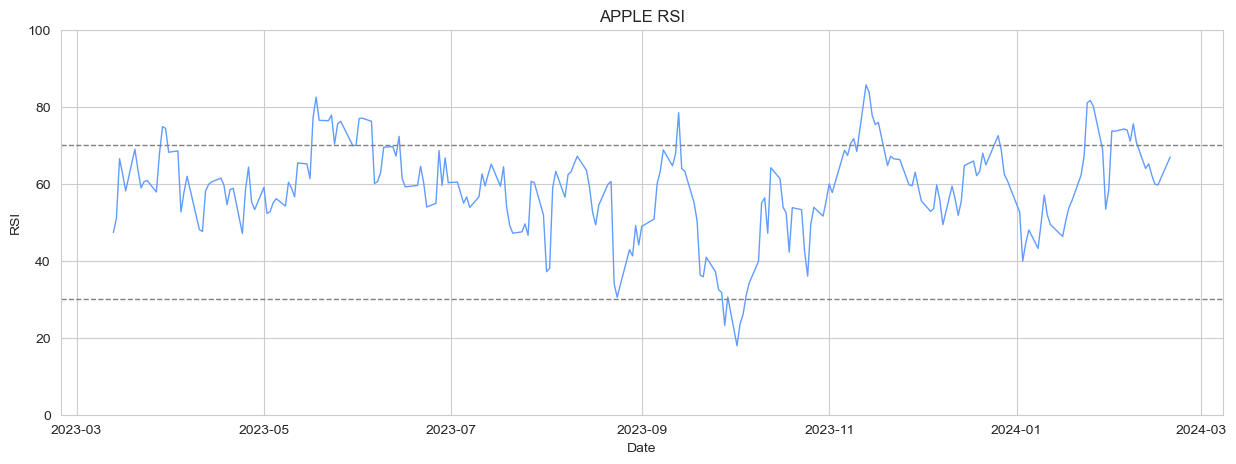

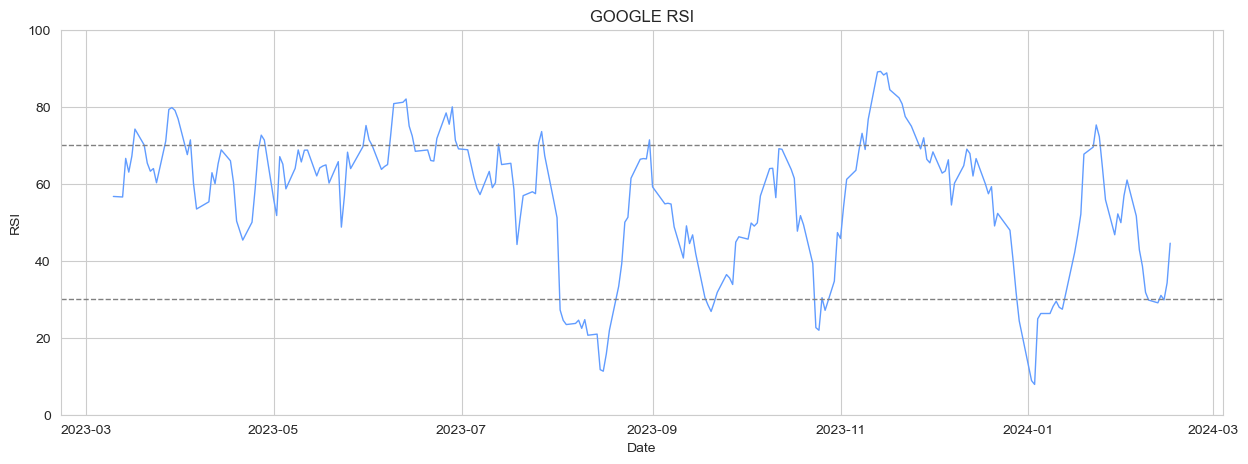

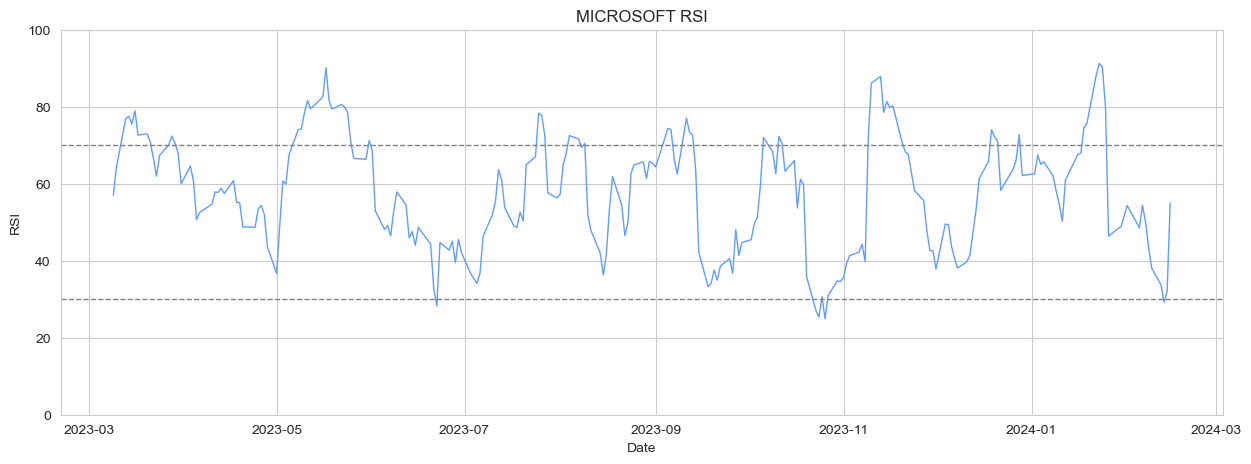

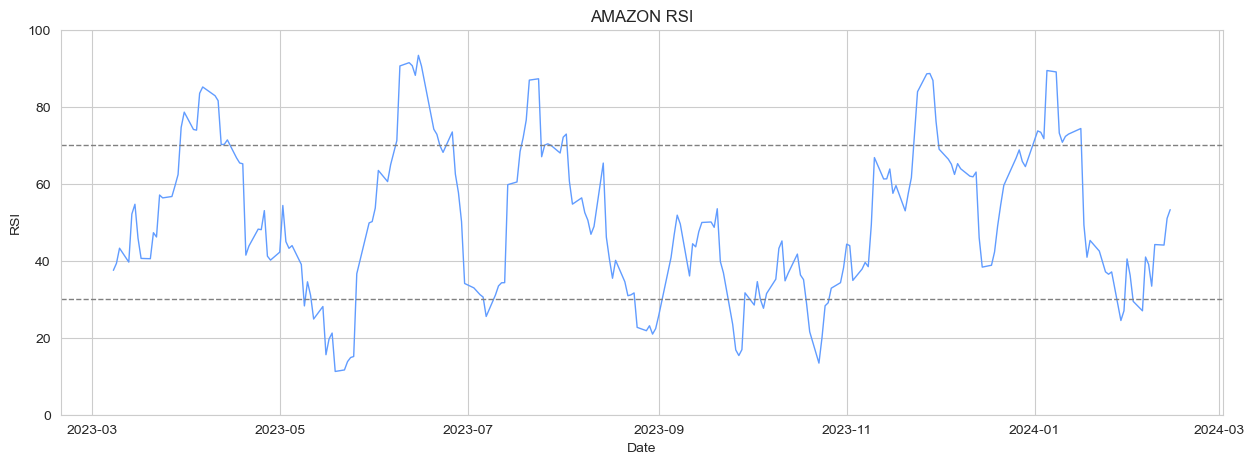

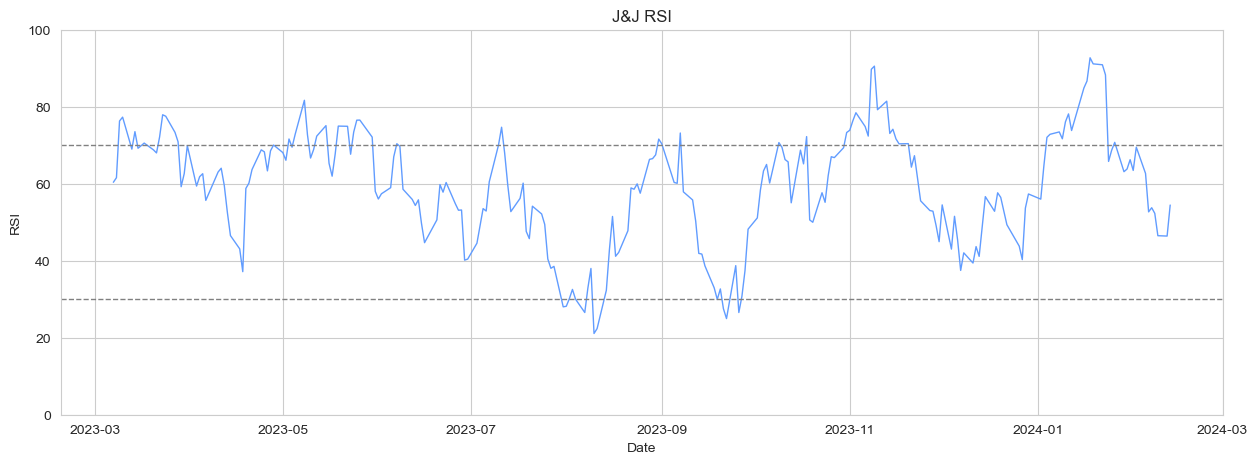

<Figure size 640x480 with 0 Axes>

In [6]:
for company in company_name:
    com_subset = df[df['company_name'] == company]
    plt.figure(figsize =(15,5))
    plt.plot(com_subset.index , com_subset['RSI'],label = f'{company} RSI',color = '#619CFF' , linewidth = 1)
    plt.title(f"{company} RSI")
    plt.xlabel("Date")
    plt.ylabel("RSI")
    plt.ylim(0,100)
    plt.axhline(70,linewidth = 1, linestyle = '--' , color = 'grey')
    plt.axhline(30,linewidth = 1, linestyle = '--' , color = 'grey')
    plt.show()


plt.tight_layout()

# RSI > 70 overbought 
# RSI < 30 oversold

In [7]:
df['Date'] = df.index
df

,Open,High,Low,Close,Adj Close,Volume,company_name,RSI,Date
Date,,,,,,,,,
2023-02-09,153.779999,154.330002,150.419998,150.869995,150.031403,56007100,APPLE,NaN,2023-02-09
2023-02-10,149.460007,151.339996,149.220001,151.009995,150.399887,57450700,APPLE,NaN,2023-02-10
2023-02-13,150.949997,154.259995,150.919998,153.850006,153.228439,62199000,APPLE,NaN,2023-02-13
2023-02-14,152.119995,153.770004,150.860001,153.199997,152.581055,61707600,APPLE,NaN,2023-02-14
2023-02-15,153.110001,155.500000,152.880005,155.330002,154.702454,65573800,APPLE,NaN,2023-02-15
...,...,...,...,...,...,...,...,...,...
2024-02-02,157.970001,158.309998,155.940002,156.610001,156.610001,8295500,J&J,NaN,2024-02-02
2024-02-05,156.610001,156.889999,155.339996,155.800003,155.800003,9121600,J&J,NaN,2024-02-05
2024-02-06,155.830002,158.729996,155.600006,158.059998,158.059998,9229900,J&J,NaN,2024-02-06


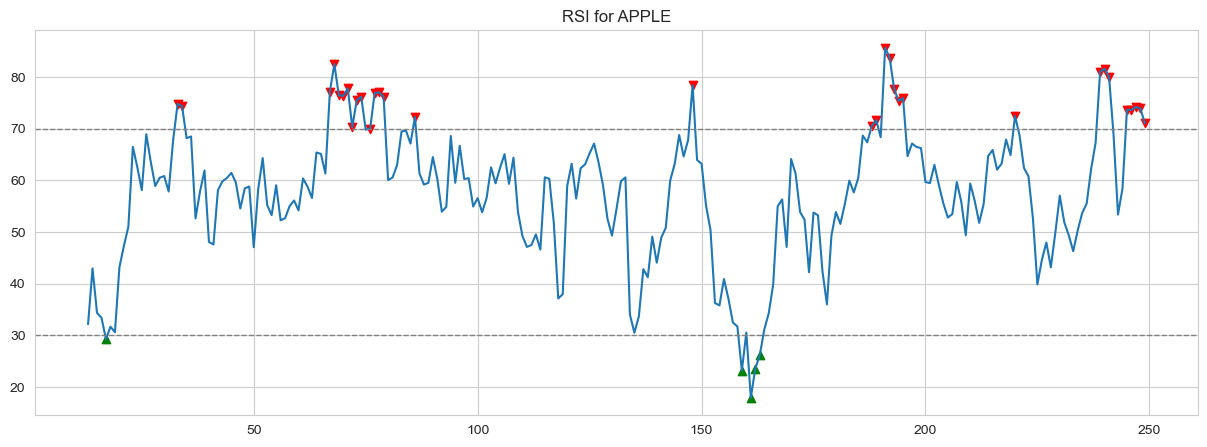

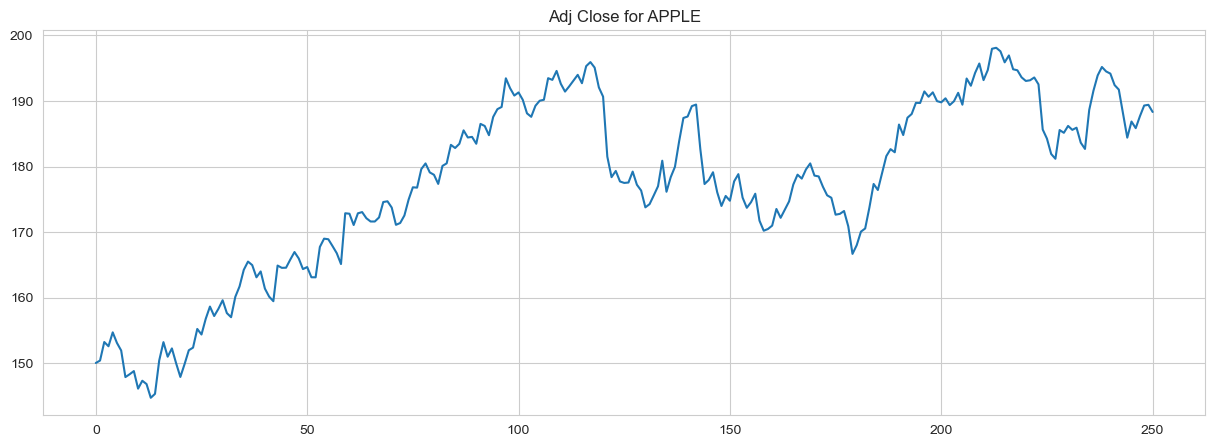

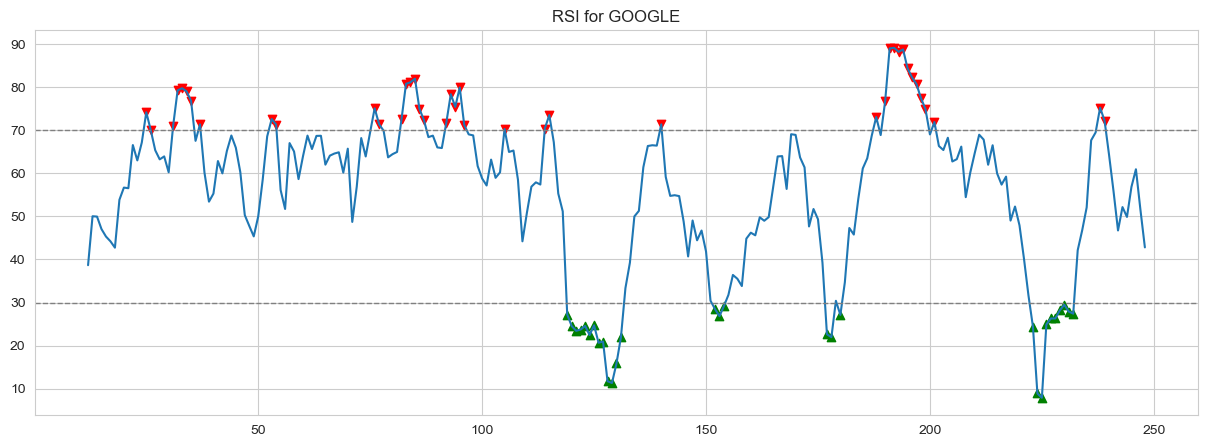

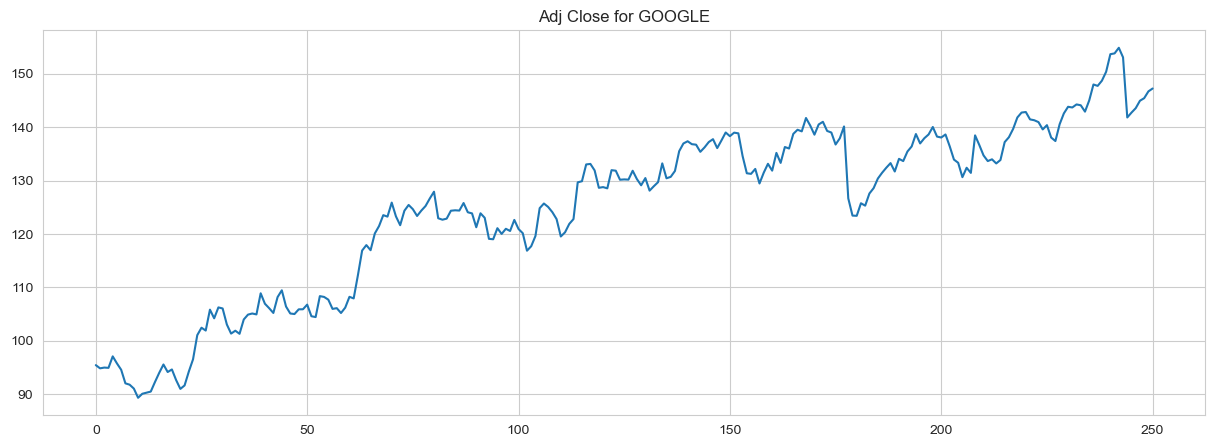

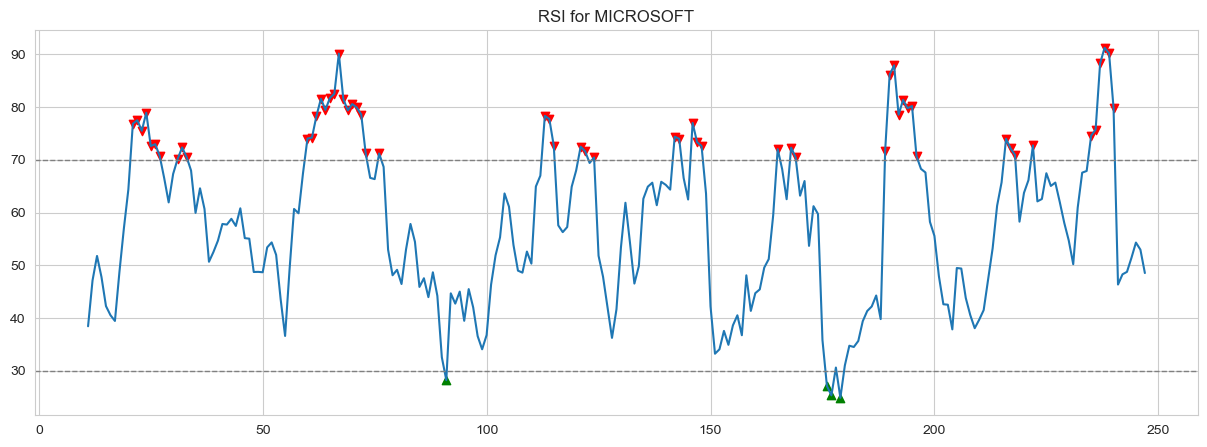

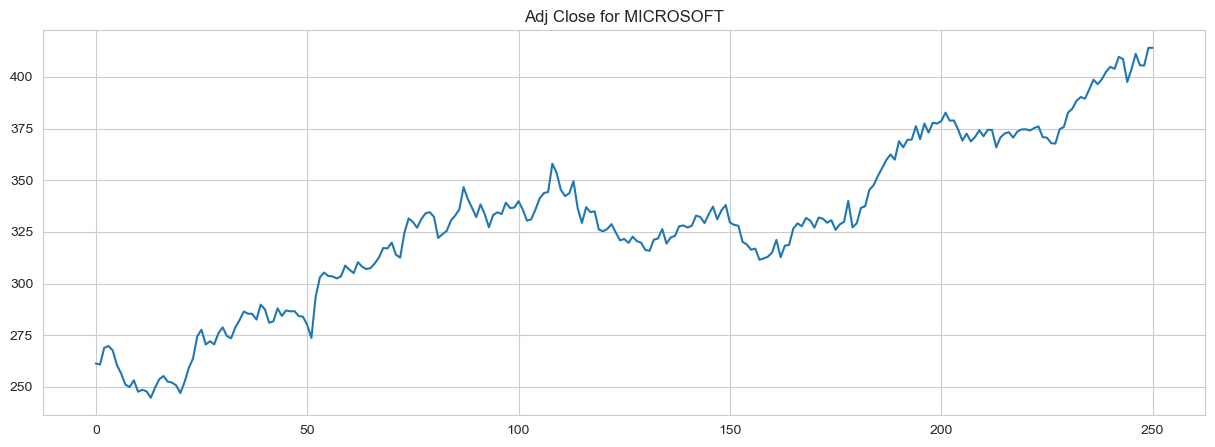

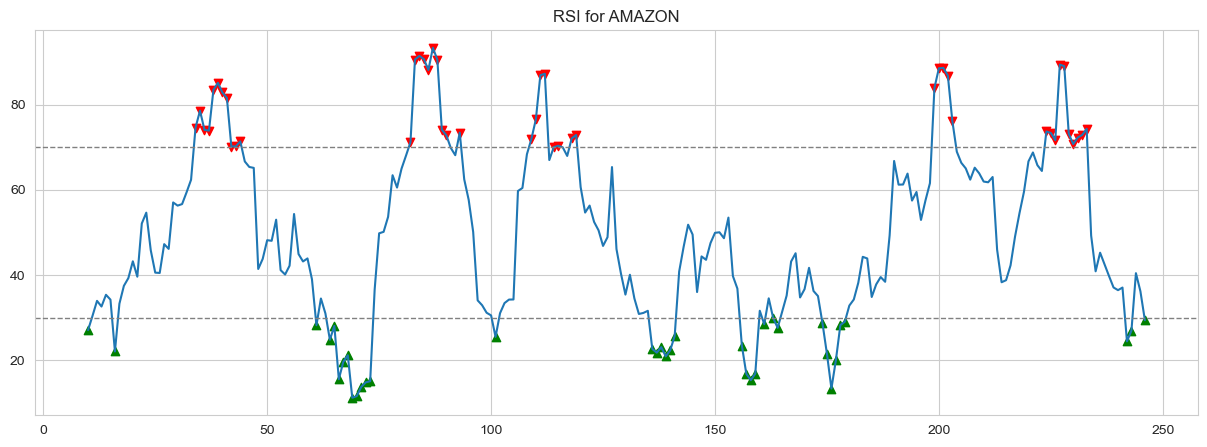

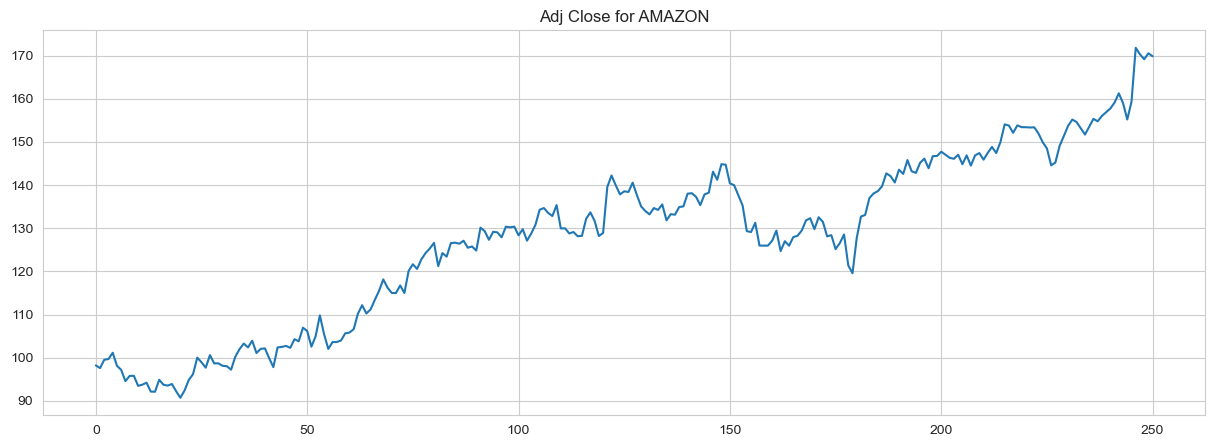

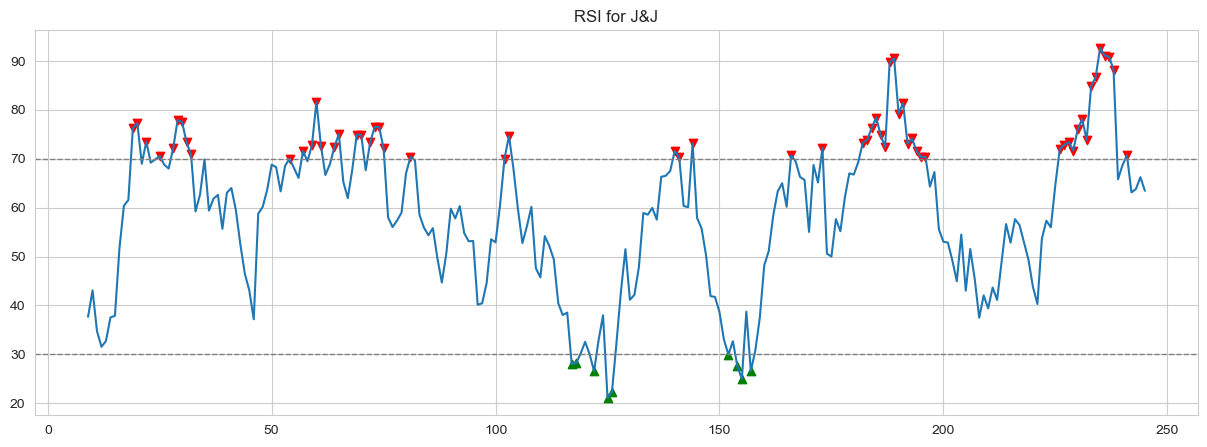

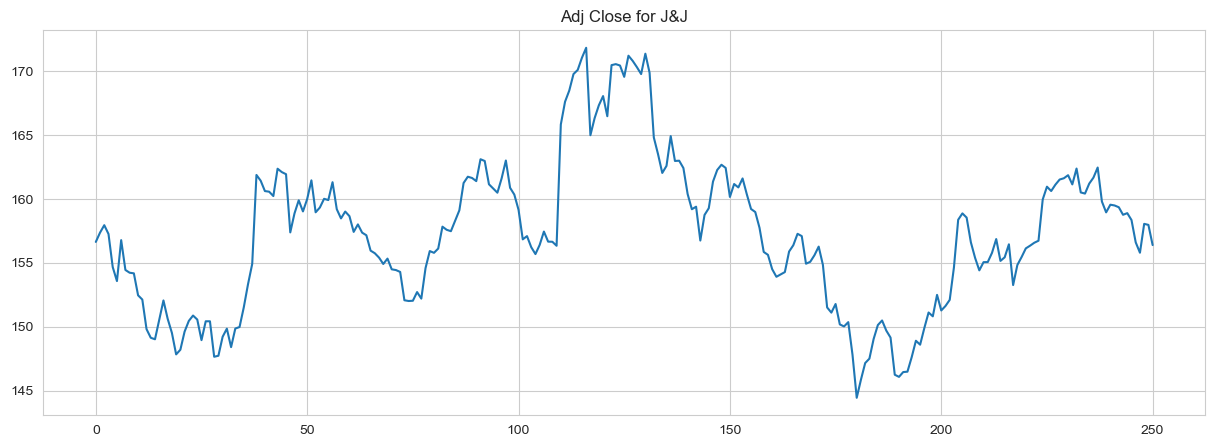

In [8]:
def rsi_str(df,ov_sol = 30,ov_bo = 70):
    df['buy_signal'] = np.where(df['RSI'] < ov_sol,1,0)
    df['sell_signal'] = np.where(df['RSI'] > ov_bo,-1,0)
    return df

for company in df['company_name'].unique():
    com_subset = df[df['company_name'] == company].copy()
    
    com_subset = rsi_str(com_subset)

    com_subset.reset_index(drop = True, inplace = True)
    

    plt.figure(figsize=(15,5))
    plt.plot(com_subset.index,com_subset['RSI'],label = 'RSI')
    plt.scatter(com_subset.index[com_subset['buy_signal'] == 1 ] ,com_subset['RSI'][com_subset['buy_signal'] == 1],marker = '^' ,color ='g',label ='buy signal')
    plt.scatter(com_subset.index[com_subset['sell_signal'] == -1 ] ,com_subset['RSI'][com_subset['sell_signal'] == -1],marker = 'v' ,color ='r',label ='sell signal')
    plt.axhline(70,linewidth = 1, linestyle = '--' , color = 'grey')
    plt.axhline(30,linewidth = 1, linestyle = '--' , color = 'grey')
    plt.title(f"RSI for {company}")

    plt.figure(figsize=(15,5))
    plt.plot(com_subset.index,com_subset['Adj Close'],label = 'Adj Close')
    plt.title(f"Adj Close for {company}")
    plt.show()

In [9]:
def rsi_str(df,ov_sol = 30,ov_bo = 70):
    df['buy_signal'] = np.where(df['RSI'] < ov_sol,1,0)
    df['sell_signal'] = np.where(df['RSI'] > ov_bo,-1,0)
    df['signal'] =np.where((df['buy_signal'] == 1) & (df['sell_signal'] == 0),1,0)
    df['signal'] =np.where((df['sell_signal'] == -1) & (df['buy_signal'] == 0),0,df['signal'])
    return df

data = rsi_str(df)

In [10]:
df = data 